In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

## Load in the data

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train, x_test = x_train/255.0, x_test/255.0

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

## Build the model

In [6]:
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [7]:
# compile
model.compile(optimizer=Adam(learning_rate=0.01),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
# train
r = model.fit(x_train, y_train, 
              validation_data=(x_test, y_test), 
              epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2519 - accuracy: 0.9227 - val_loss: 0.1479 - val_accuracy: 0.9570
Epoch 2/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1071 - accuracy: 0.9693 - val_loss: 0.1055 - val_accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0898 - accuracy: 0.9736 - val_loss: 0.0889 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0876 - accuracy: 0.9736 - val_loss: 0.0813 - val_accuracy: 0.9774
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0822 - accuracy: 0.9757 - val_loss: 0.1005 - val_accuracy: 0.9724
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0799 - accuracy: 0.9761 - val_loss: 0.0879 - val_accuracy: 0.9743
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0841 - accuracy: 0.9748 - val_loss: 0.0976 -

## Plot loss per iteration

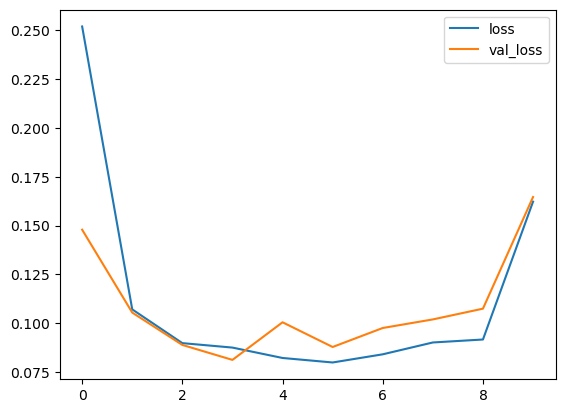

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## Plot accuracy per iteration

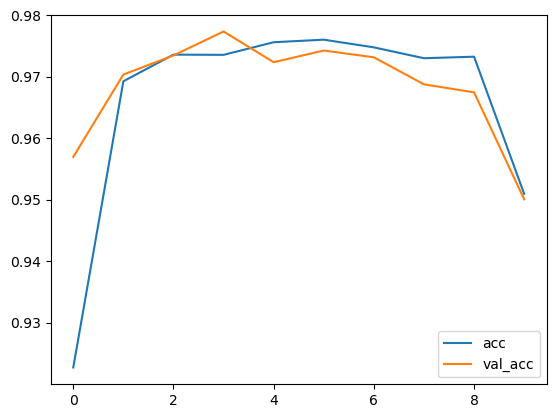

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Plot confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

313/313 [==============================] - 2s 5ms/step
Confusion matrix, without normalization
[[ 944    0    4    1    2    2   10    0   16    1]
 [   0 1096   11    2    2    5    8    2    9    0]
 [   2    2  977   24    0    0    7    7   11    2]
 [   0    1    9  969    0   13    0    7    7    4]
 [   0    4    3    0  926    1    1    3    6   38]
 [   8    4    6   14    1  815    8    1   27    8]
 [   8    2    5    0    4    5  929    0    5    0]
 [   1   10   13   13    7    1    0  972    3    8]
 [   7    2    4    4    4    8    7    2  929    7]
 [   1    3    1    5   30    6    0   10    9  944]]


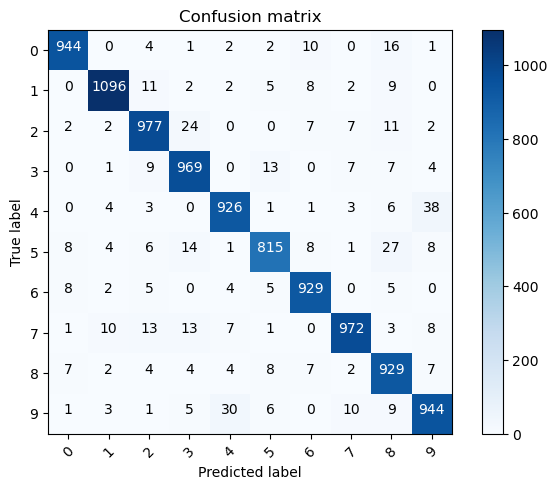

In [14]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

## Show some misclassified examples

Text(0.5, 1.0, 'True label: 2 Predicted: 8')

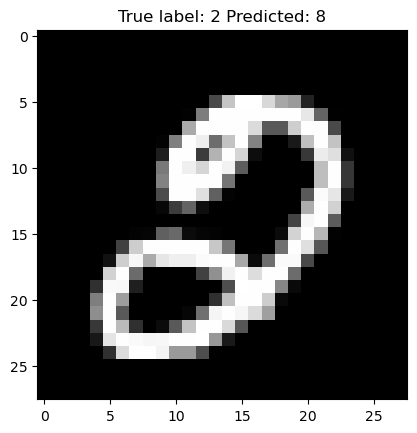

In [15]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.save('rnn_mnist.h5')